## Import Necessary Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Dataset From Kaggle

In [102]:
dataset = pd.read_csv('final_cars_datasets.csv')

In [103]:
dataset

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [104]:
dataset.columns

Index(['Unnamed: 0', 'price', 'mark', 'model', 'year', 'mileage',
       'engine_capacity', 'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

## Remove the first unnecessary column

In [105]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [106]:
dataset

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


# EDA

## Looking at various quantitative columns

In [107]:
dataset.describe()

,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,2005.972390,100013.194996,1507.010785
std,288.673112,3.698863,52512.478883,549.585170
min,80.000000,1979.000000,2000.000000,9.000000
25%,776.000000,2004.000000,67000.000000,1300.000000
50%,1000.000000,2006.000000,94000.000000,1490.000000
75%,1213.000000,2009.000000,124000.000000,1800.000000
max,1400.000000,2015.000000,790000.000000,12340.000000


## The Correlation Coefficient between various quantitative variables

In [108]:
dataset.corr()

,price,year,mileage,engine_capacity
price,1.000000,-0.211092,0.021581,0.173748
year,-0.211092,1.000000,0.086065,-0.142460
mileage,0.021581,0.086065,1.000000,0.130362
engine_capacity,0.173748,-0.142460,0.130362,1.000000


Looks like the quantitative variables have weak relationship with price as the correlation coefficient are in between 0.0 and 0.3 

## Checking for Null Values

In [111]:
dataset.shape

(2318, 10)

In [112]:
dataset.isna().sum()

price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [113]:
dataset.isnull().sum()

price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

 # EDA

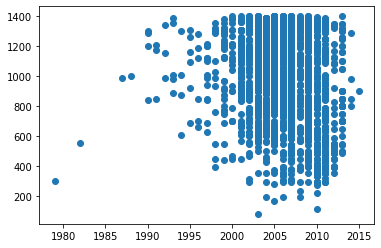

In [116]:
plt.scatter(dataset['year'],dataset['price'],marker='o')

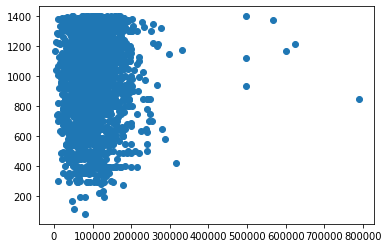

In [117]:
plt.scatter(dataset['mileage'],dataset['price'],marker='o')

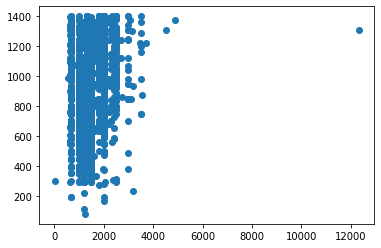

In [118]:
plt.scatter(dataset['engine_capacity'],dataset['price'],marker='o')

## Building a model only using the numerical columns

In [119]:
X = dataset[['engine_capacity','year','mileage']]
y = dataset[['price']]

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [121]:
lr = LinearRegression()

In [122]:
lr.fit(X_train,y_train)

LinearRegression()

In [123]:
lr.coef_

array([[ 9.73205598e-02, -1.21249531e+01,  1.04457542e-04]])

In [124]:
lr.intercept_

array([25136.29657357])

In [125]:
result = lr.predict(X_test)

In [126]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean absolute error =", sklearn.metrics.mean_absolute_error(y_test, result)) 
print("Mean squared error =", sklearn.metrics.mean_squared_error(y_test,result)) 

Mean absolute error = 230.37618177979633
Mean squared error = 77560.14142237617


## EDA-2

In [127]:
dataset.columns

Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [128]:
dataset.dtypes

price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

## Finding Unique Value

In [129]:
for col in ['mark','model','transmission','drive','hand_drive','fuel']:
    print(f"{col} has values: {dataset[col].unique()}")

mark has values: ['nissan' 'toyota' 'daihatsu' 'volkswagen' 'mazda' 'honda' 'subaru'
 'mercedes-benz' 'kubota' 'mitsubishi' 'suzuki' 'bmw' 'chrysler' 'smart'
 'gm' 'opel' 'isuzu' 'land rover' 'peugeot' 'hyundai' 'kia motors' 'audi'
 'citroen' 'mitsuoka' 'volvo' 'ford' 'hino' 'jaguar']
model has values: ['march' 'lafesta' 'avensis' 'mira' 'passat' 'bongo van' 'step wgn'
 'sambar' 'inspire' 'mercedes-benz others' 'note' 'passo' 'impreza'
 'kubota others' 'life' 'progres' 'cube cubic' 'cube' 'a-class' 'coltplus'
 'mr wagon' 'pajero mini' 'fit' 'legacy b4' 'vitz' 'mark ii blit'
 'insight' 'move' 'tanto' 'terios kid' 'az-wagon' 'coo' 'verisa' 'swift'
 'delica d2' 'tiida' 'sienta' 'mini' 'colt' 'platz' 'bluebird sylphy'
 'eclipse' 'bb' 'moco' 'clipper truck' 'esse' 'ek wagon' 'polo' 'x-trail'
 'atenza sport' 'ad van' 'pixis space' 'freed spike' 'stream' 'alto'
 'raum' 'wish' 'every' 'demio' 'jimny' 'premacy' 'cr-v' 'lapin' 'delica'
 'wagon r' 'lancer' 'naked' 'odyssey' 'ractis' 'porte' 'coro

<AxesSubplot:xlabel='fuel', ylabel='price'>

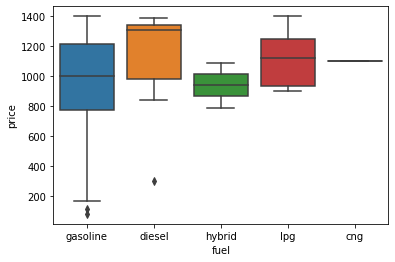

In [143]:
sns.boxplot(x='fuel',y='price',data=dataset)

In [156]:
dataset[dataset['fuel']=='cng']

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1393,1100,toyota,probox,2004,81516,1500,at,2wd,rhd,cng


<AxesSubplot:xlabel='hand_drive', ylabel='price'>

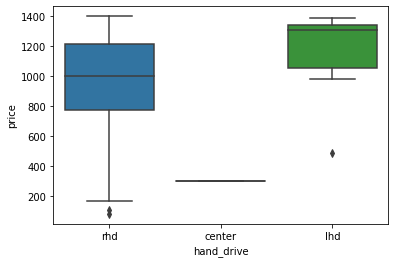

In [147]:
sns.boxplot(x='hand_drive',y='price',data=dataset)

In [157]:
dataset[dataset['hand_drive']=='center']

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
23,300,kubota,kubota others,1979,9999,9,mt,4wd,center,diesel


<AxesSubplot:xlabel='drive', ylabel='price'>

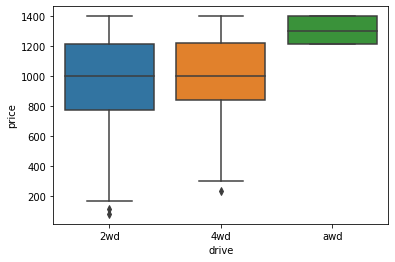

In [149]:
sns.boxplot(x='drive',y='price',data=dataset)

<AxesSubplot:xlabel='transmission', ylabel='price'>

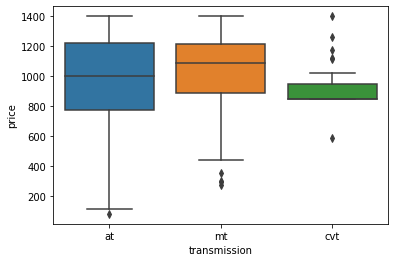

In [151]:
sns.boxplot(x='transmission',y='price',data=dataset)

<AxesSubplot:xlabel='mark', ylabel='price'>

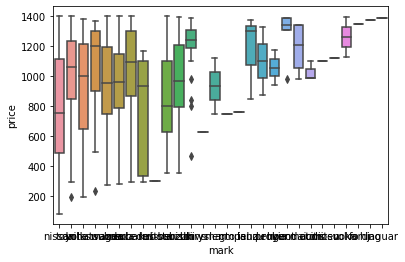

In [153]:
sns.boxplot(x='mark',y='price',data=dataset)

/home/prabesh013/Desktop/ml/ml_venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

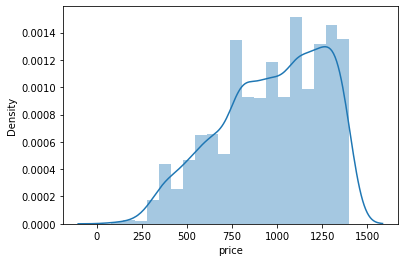

In [163]:
sns.distplot(dataset['price'])

## Applying One Hot Encoding for Categorical Variables

In [178]:
dataset_onehot = dataset.copy()
dataset_onehot = pd.get_dummies(dataset_onehot, columns=['mark','model','transmission','drive','hand_drive','fuel'])
dataset_onehot.head()

,price,year,mileage,engine_capacity,mark_audi,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,...,drive_4wd,drive_awd,hand_drive_center,hand_drive_lhd,hand_drive_rhd,fuel_cng,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,80,2003,80000,1240,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,110,2010,53000,1200,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,165,2005,47690,2000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,190,2008,130661,1990,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,190,2006,66300,660,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [179]:
print(dataset.shape)
print(dataset_onehot.shape)

(2318, 10)
(2318, 304)


Dimension increased from 10 to 304 while doing One Hot Encoding

In [180]:
dataset_onehot.describe()

,price,year,mileage,engine_capacity,mark_audi,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,...,drive_4wd,drive_awd,hand_drive_center,hand_drive_lhd,hand_drive_rhd,fuel_cng,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,...,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,2005.972390,100013.194996,1507.010785,0.001294,0.011648,0.000431,0.000431,0.024159,0.000431,...,0.082830,0.002157,0.000431,0.006903,0.992666,0.000431,0.007765,0.987921,0.000863,0.003020
std,288.673112,3.698863,52512.478883,549.585170,0.035960,0.107319,0.020770,0.020770,0.153575,0.020770,...,0.275685,0.046404,0.020770,0.082812,0.085342,0.020770,0.087797,0.109264,0.029367,0.054882
min,80.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1000.000000,2006.000000,94000.000000,1490.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1213.000000,2009.000000,124000.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1400.000000,2015.000000,790000.000000,12340.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
dataset_onehot.corr()

,price,year,mileage,engine_capacity,mark_audi,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,...,drive_4wd,drive_awd,hand_drive_center,hand_drive_lhd,hand_drive_rhd,fuel_cng,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
price,1.000000,-0.211092,0.021581,0.173748,0.006920,0.080173,-0.024943,0.009536,-0.029753,0.027244,...,0.030856,0.053754,-0.048338,0.065024,-0.051332,0.009248,0.055712,-0.059035,-0.003210,0.026625
year,-0.211092,1.000000,0.086065,-0.142460,-0.009466,-0.038331,-0.027934,-0.011080,-0.029216,-0.011080,...,-0.233081,-0.060001,-0.151524,-0.044466,0.080025,-0.011080,-0.067119,0.073927,0.043925,-0.059119
mileage,0.021581,0.086065,1.000000,0.130362,-0.026071,-0.060424,-0.006268,-0.011085,0.044320,-0.005545,...,0.112411,0.029221,-0.035619,0.019173,-0.009936,-0.007319,0.085708,-0.153863,-0.005605,0.174982
engine_capacity,0.173748,-0.142460,0.130362,1.000000,0.023563,0.064692,0.018639,0.018261,-0.232115,0.029982,...,0.059652,-0.003639,-0.056638,0.072591,-0.056654,-0.000265,0.102351,-0.112787,-0.011071,0.066836
mark_audi,0.006920,-0.009466,-0.026071,0.023563,1.000000,-0.003908,-0.000748,-0.000748,-0.005664,-0.000748,...,0.076253,-0.001674,-0.000748,-0.003001,0.003094,-0.000748,-0.003185,0.003981,-0.001058,-0.001981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel_cng,0.009248,-0.011080,-0.007319,-0.000265,-0.000748,-0.002255,-0.000432,-0.000432,-0.003269,-0.000432,...,-0.006243,-0.000966,-0.000432,-0.001732,0.001786,1.000000,-0.001838,-0.187878,-0.000610,-0.001143
fuel_diesel,0.055712,-0.067119,0.085708,0.102351,-0.003185,-0.009604,-0.001838,-0.001838,-0.013919,-0.001838,...,0.044740,-0.004113,0.234836,0.704956,-0.741210,-0.001838,1.000000,-0.800039,-0.002600,-0.004869
fuel_gasoline,-0.059035,0.073927,-0.153863,-0.112787,0.003981,0.012004,0.002297,0.002297,0.017398,0.002297,...,-0.024082,0.005141,-0.187878,-0.563162,0.592192,-0.187878,-0.800039,1.000000,-0.265757,-0.497723
fuel_hybrid,-0.003210,0.043925,-0.005605,-0.011071,-0.001058,-0.003190,-0.000610,-0.000610,-0.004624,-0.000610,...,-0.008831,-0.001366,-0.000610,-0.002450,0.002526,-0.000610,-0.002600,-0.265757,1.000000,-0.001617


In [182]:
X = dataset_onehot.iloc[:,1:]
y = dataset_onehot[['price']]

In [183]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [184]:
lr2 = LinearRegression()

In [185]:
lr2.fit(X_train,y_train)

LinearRegression()

In [186]:
lr2.coef_

array([[-2.33899559e+00,  3.74084301e-05,  4.08047731e-02,
        -1.49530943e+01,  1.15810475e+02, -2.17295055e+02,
         5.88587525e-08, -8.11811904e+01,  2.72848695e-08,
        -1.39501784e+02,  1.55990833e+02, -5.49232289e+01,
         4.19509599e+02,  1.03725154e+02,  1.66341501e+02,
         2.46436798e+02, -1.49249259e+02, -1.60114126e-08,
        -9.22272419e+01, -2.55501844e+02, -1.32081799e+02,
         3.87593152e+01, -4.47221135e+01, -1.48063919e+02,
        -3.80323399e-08, -1.27804480e+02, -4.12720003e+01,
        -2.45443131e+00,  4.48134146e+01,  3.14105358e+01,
         1.78433815e+02,  1.54871491e+02, -4.44574084e-08,
         8.16999178e+01,  8.12862311e-09, -4.42281472e+02,
        -7.47654713e+00, -7.47654713e+00, -3.50579361e+01,
         1.58801079e+02,  1.75381788e+02,  3.51024220e+02,
        -3.62949227e+02, -1.40722444e+02,  1.07004479e+02,
        -8.60887760e+01,  1.33271215e+02,  1.24773730e+02,
        -4.88442069e+00,  1.34242447e+02, -6.78053303e+0

In [187]:
lr2.intercept_

array([5486.236784])

In [188]:
result = lr2.predict(X_test)

In [189]:
print("Mean absolute error =", sklearn.metrics.mean_absolute_error(y_test, result)) 
print("Mean squared error =", sklearn.metrics.mean_squared_error(y_test,result)) 

Mean absolute error = 214.95375329562518
Mean squared error = 73232.205272523
